In [1]:
%pip install --quiet \
    pillow==9.5.0 \
    scikit-learn==1.5.2 \
    matplotlib==3.8.0 \
    vietocr \
    torch \
    torchvision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
np.bool = bool
np.int  = int
np.float = float

In [3]:
import importlib, PIL, PIL._util
importlib.reload(PIL)
importlib.reload(PIL._util)

<module 'PIL._util' from '/usr/local/lib/python3.11/dist-packages/PIL/_util.py'>

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
import os

In [5]:
Image.ANTIALIAS = Image.LANCZOS

In [6]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [7]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': True}

In [8]:
config['aug']['image_aug'] = False

In [9]:
config['dataset'].update({
    'name': 'hw',
    'data_root': '/kaggle/input/vaipe-prescription-train-vietocr/',
    'train_annotation': 'train_annotation.txt',
    'valid_annotation': 'val_annotation.txt',
    'filtered': True,
})

config['trainer'].update({
    'print_every': 1159,
    'valid_every': 5 * 1159,
    'iters': 144875,
    'checkpoint': '/kaggle/working/checkpoint.pth',
    'export': '/kaggle/working/best_model.pth',
    'metrics': 4120
})

config['device'] = 'cuda:0'

In [10]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 1159,
  'valid_every': 5795,
  'iters': 144875,
  'export': '/kaggle/working/best_model.pth',
  'checkpoint': '/kaggle/working/checkpoint.pth',
  'log': './train.log',
  'metrics': 4120},
 'dataset': {'name': 'hw',
  'data_root': '/kaggle/input/vaipe-prescription-train-vietocr/',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'val_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512,
  'filtered': True},
 'dataloa

In [11]:
!rm -rf train_hw valid_hw

In [12]:
from vietocr.loader.aug import ImgAugTransform
from imgaug import augmenters as iaa
import numpy as np

class MyAugmentor(ImgAugTransform):
    def __init__(self):
        def pad_width_relative_to_height(image, random_state, parents, hooks):
            h, w, c = image.shape
            target_w = int(np.random.uniform(2.0, 4.0) * w)  # Pad based on height to make it more exaggerated
            if target_w > w:
                pad_total = target_w - w
                pad_left = pad_total // 2
                pad_right = pad_total - pad_left
                # Use a dark gray padding instead of white (can use 0 for black, or other values)
                pad_value = 180
                image = np.pad(
                    image,
                    ((0, 0), (pad_left, pad_right), (0, 0)),
                    mode='constant',
                    constant_values=pad_value
                )
            return image

        self.aug = iaa.Sequential([
            iaa.Lambda(func_images=pad_width_relative_to_height),
            iaa.GaussianBlur(sigma=(0.5, 1.2)),  # more visible blur
            iaa.Sometimes(0.8, iaa.Multiply((0.7, 1.3))),  # wider brightness range
            iaa.Sometimes(0.5, iaa.LinearContrast((0.6, 1.6))),  # more aggressive contrast
            # Optional extras to make degradation more obvious:
            # iaa.AdditiveGaussianNoise(scale=(0, 0.08 * 255)),
            # iaa.MotionBlur(k=5),
        ])


In [13]:
trainer = Trainer(config, pretrained=True, augmentor= MyAugmentor)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:02<00:00, 222MB/s]
10935it [00:06, 1813.44it/s]
Create train_hw: 100%|███████████████████████████████████████| 37087/37087 [02:53<00:00, 214.16it/s]

Created dataset with 37086 samples



Create valid_hw: 100%|█████████████████████████████████████████| 4121/4121 [00:16<00:00, 247.42it/s]

Created dataset with 4120 samples



valid_hw build cluster: 100%|███████████████████████████████| 4120/4120 [00:00<00:00, 157177.20it/s]


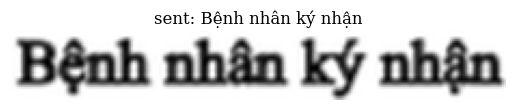

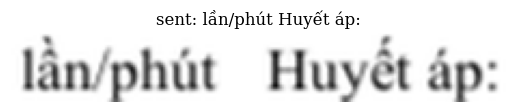

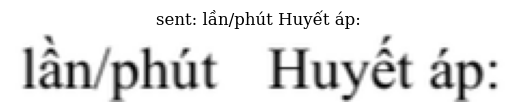

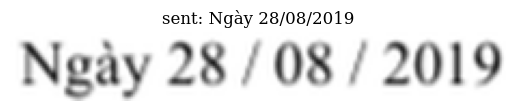

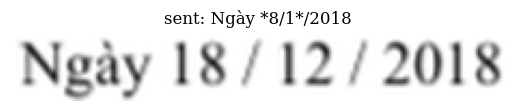

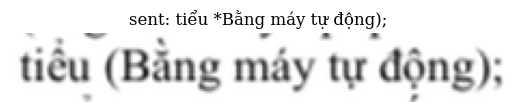

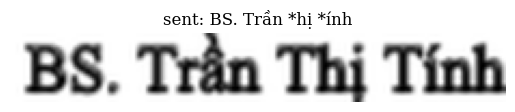

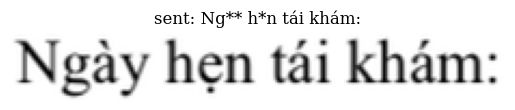

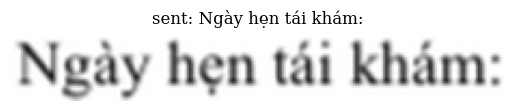

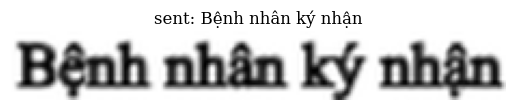

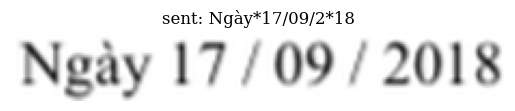

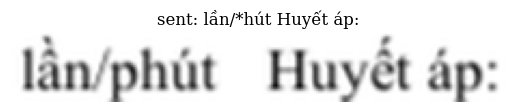

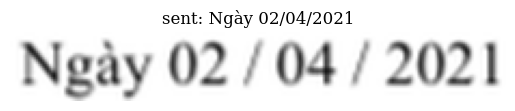

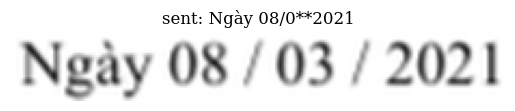

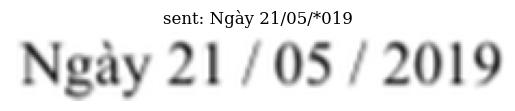

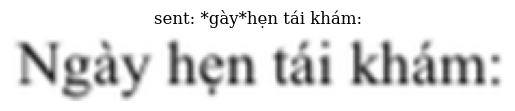

In [14]:
trainer.visualize_dataset()

In [15]:
trainer.config.save('config.yml')

In [16]:
trainer.train()

iter: 001159 - train loss: 0.722 - lr: 5.51e-05 - load time: 0.54 - gpu time: 180.83
iter: 002318 - train loss: 0.692 - lr: 9.94e-05 - load time: 0.47 - gpu time: 179.39
iter: 003477 - train loss: 0.686 - lr: 1.70e-04 - load time: 0.45 - gpu time: 178.32
iter: 004636 - train loss: 0.684 - lr: 2.63e-04 - load time: 0.52 - gpu time: 178.55
iter: 005795 - train loss: 0.685 - lr: 3.72e-04 - load time: 0.49 - gpu time: 178.75
iter: 005795 - valid loss: 0.700 - acc full seq: 0.9261 - acc per char: 0.9563
iter: 006954 - train loss: 0.684 - lr: 4.90e-04 - load time: 0.49 - gpu time: 179.57
iter: 008113 - train loss: 0.688 - lr: 6.10e-04 - load time: 0.50 - gpu time: 183.57
iter: 009272 - train loss: 0.691 - lr: 7.24e-04 - load time: 0.52 - gpu time: 175.00
iter: 010431 - train loss: 0.683 - lr: 8.26e-04 - load time: 0.51 - gpu time: 180.77
iter: 011590 - train loss: 0.692 - lr: 9.08e-04 - load time: 0.48 - gpu time: 180.44
iter: 011590 - valid loss: 0.708 - acc full seq: 0.9084 - acc per char:

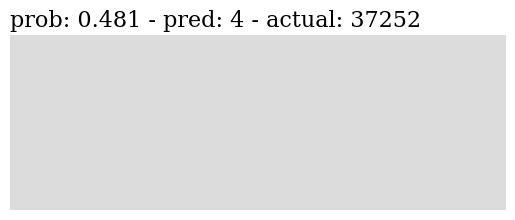

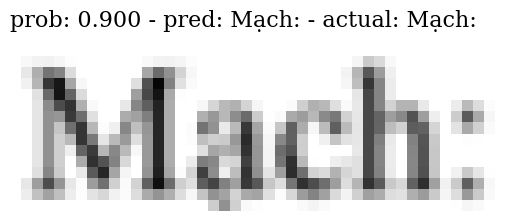

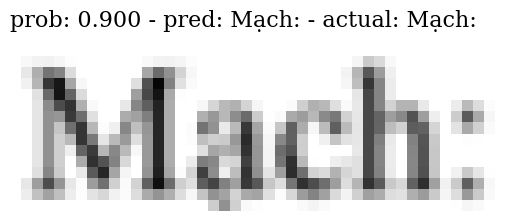

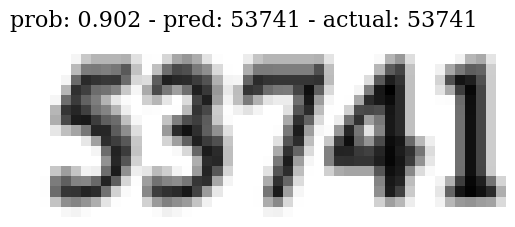

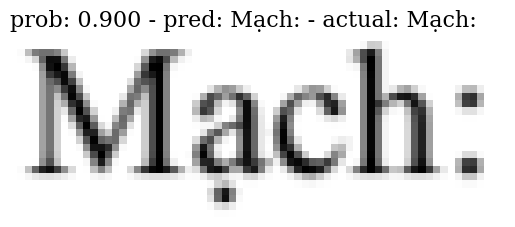

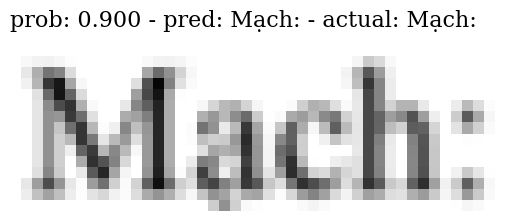

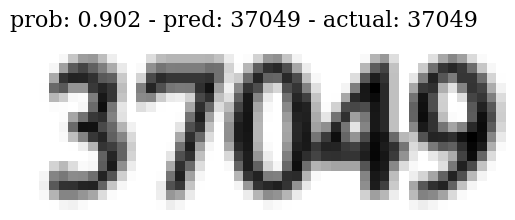

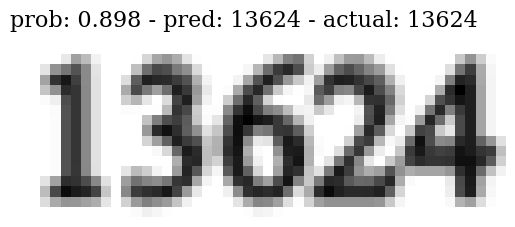

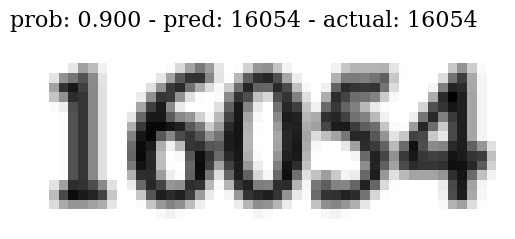

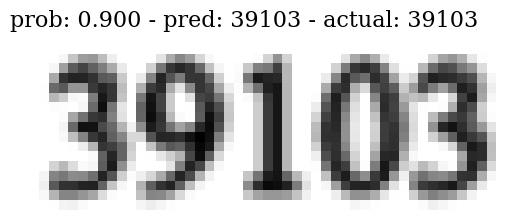

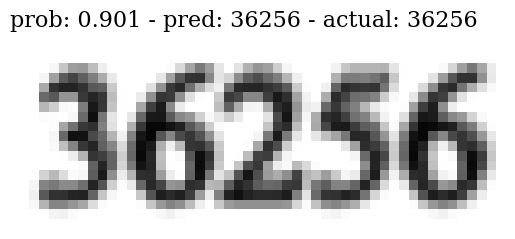

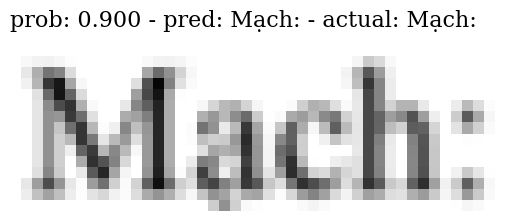

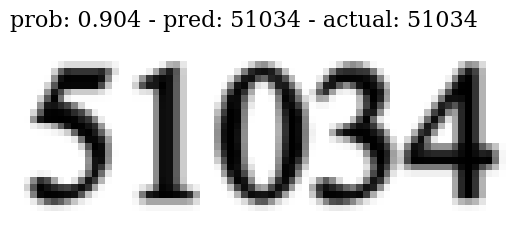

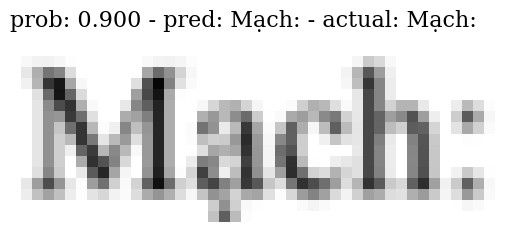

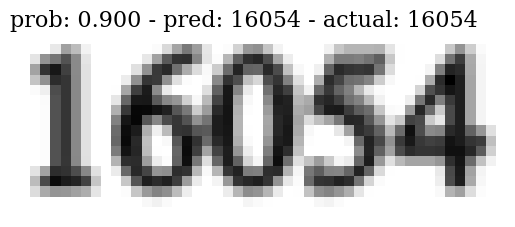

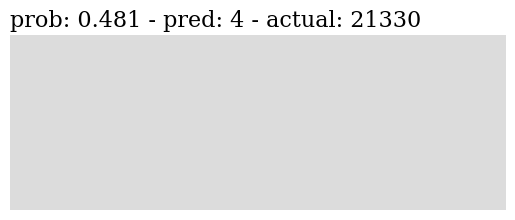

In [17]:
trainer.visualize_prediction()

In [18]:
trainer.precision()

(0.9441105769230769, 0.9621741)

In [19]:
import torch
torch.save(trainer.model.state_dict(), '/kaggle/working/final_model.pth')

In [20]:
from torchsummary import summary

model = trainer.model

total_params = sum(p.numel() for p in model.parameters())

print(total_params)

22371113


## Inference

In [21]:
%pip install --quiet \
    pillow==9.5.0 \
    scikit-learn==1.5.2 \
    gymnasium==0.29.0 \
    rich==13.7.1 \
    matplotlib==3.8.0 \
    vietocr \
    torch \
    torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import importlib, PIL, PIL._util
importlib.reload(PIL)
importlib.reload(PIL._util)

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

from vietocr.tool.config import Cfg
from vietocr.tool.predictor import Predictor
import os

Image.ANTIALIAS = Image.LANCZOS

In [23]:
import torch
from torchvision import transforms
import numpy as np

np.bool = bool
np.int = int
np.float = float

In [24]:
config = Cfg.load_config_from_name('vgg_seq2seq')

# Set the path to the saved model
config['weights'] = '//kaggle/working/final_model.pth'

# Set device
config['device'] = 'cuda'  

# Initialize Predictor
predictor = Predictor(config)

In [25]:
img = Image.open('//kaggle/input/test-image-delete-when-see/test_image/2bb8b82a-1b4c-4679-b56f-b261349b350e (1).png')
print(img.format, img.size, img.mode)

PNG (345, 21) L


In [26]:
def vietocr_recognize_text(model, image_path):
    image = Image.open(image_path).convert('RGB')
    pred_text = predict_vietocr(model, image)
    return pred_text

def predict_vietocr(model, image):
    return model.predict(image)

def run_vietocr_on_folder(model, image_dir, output_file='text_recognition_output.txt'):

    predictions = []
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_name in tqdm(image_files, desc="Processing images"):
        image_path = os.path.join(image_dir, image_name)
        try:
            image = Image.open(image_path).convert('RGB')
            pred_text = predict_vietocr(model, image)
            predictions.append(pred_text)
        except Exception as e:
            predictions.append(f"ERROR: {str(e)}")

    output_dir = os.path.dirname(output_file)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)

    with open(output_file, 'w', encoding='utf-8') as f:
        for line in predictions:
            f.write(line + '\n')

    print(f"Predictions written to {output_file}")

In [27]:
predict_vietocr(predictor, img)

'46 trong bệnh mạch não (160-1677)'